# Observed Trends
1) CNN and NYTimes have negative overall media sentiment scores while BBC, CBS, and Fox have positive overall media sentiment scores. 

2) CBS has the highest overall media sentiment score.

3) CNN has the lowest overall media sentiment score.

In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import seaborn as sns

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
def get_file_contents(filename):
    try:
        with open(filename, 'r') as f:
            return f.read().strip()
    except FileNotFoundError:
        print("'%s' file not found" % filename)

consumer_key = get_file_contents('consumer_key')
consumer_secret = get_file_contents('consumer_secret')
access_token = get_file_contents('access_token')
access_token_secret = get_file_contents('access_token_secret')

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
#Target Accounts
targets = ('@BBC', '@CBS', '@CNN', '@Fox', '@nytimes')
sentiments = []
averages = []

#Loop through each media source
for target in targets:
    compound_list = []
    counter = 1
    
    #Loop through 100 tweets
    for x in range(5):
        
        #Get tweets from homefeed
        public_tweets = api.user_timeline(target, page=x)
        
        #Loop through each tweet
        for tweet in public_tweets:
            
            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet['text'])['compound']
            pos = analyzer.polarity_scores(tweet['text'])['pos']
            neu = analyzer.polarity_scores(tweet['text'])['neu']
            neg = analyzer.polarity_scores(tweet['text'])['neg']
            compound_list.append(compound)
            
            # Add sentiments for each tweet into an array
            sentiments.append({"Media Sources": target[1:],
                        'Date': tweet['created_at'],
                        'Text': tweet['text'],
                        'Compound': compound,
                        'Positive': pos,
                        'Negative': neg,
                        'Neutral': neu,
                        'Tweets Ago': counter})
    
            # Add to counter 
            counter = counter + 1
        
    #Means
    compound_mean = np.mean(compound_list)
    averages.append({'Media Source': target[1:],
                    'Compound Mean': compound_mean})

In [3]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.head()
sentiments_pd.to_csv("twitter_sentiment_data.csv")


In [4]:
#Bubble Plot Data
bbc_group = sentiments_pd.loc[sentiments_pd['Media Sources'] == 'BBC']
cbs_group = sentiments_pd.loc[sentiments_pd['Media Sources'] == 'CBS']
cnn_group = sentiments_pd.loc[sentiments_pd['Media Sources'] == 'CNN']
fox_group = sentiments_pd.loc[sentiments_pd['Media Sources'] == 'Fox']
nyt_group = sentiments_pd.loc[sentiments_pd['Media Sources'] == 'nytimes']

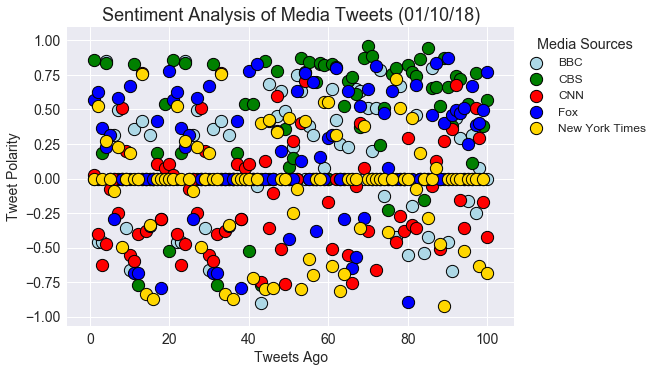

In [5]:
#Bubble Plot
plt.style.use("seaborn")
ax1 = bbc_group.plot(kind='scatter',x='Tweets Ago', y='Compound',
                     color='lightblue', edgecolor = "black", s =150, linewidth = 1, 
                     label = 'BBC')    
ax2 = cbs_group.plot(kind='scatter',x='Tweets Ago', y='Compound',
                     color='green', edgecolor = "black", s =150, linewidth = 1, 
                     label = 'CBS', ax=ax1) 
ax3 = cnn_group.plot(kind='scatter',x='Tweets Ago', y='Compound',
                     color='red', edgecolor = "black", s =150, linewidth = 1, 
                     label = 'CNN', ax=ax1)
ax4 = fox_group.plot(kind='scatter',x='Tweets Ago', y='Compound',
                     color='blue', edgecolor = "black", s =150, linewidth = 1, 
                     label = 'Fox', ax=ax1)
ax5 = nyt_group.plot(kind='scatter',x='Tweets Ago', y='Compound',
                     color='gold', edgecolor = "black", s =150, linewidth = 1, 
                     label = 'New York Times', ax=ax1)
plt.title("Sentiment Analysis of Media Tweets (01/10/18)", fontsize = 18)
plt.xlabel("Tweets Ago", fontsize = 14)
plt.ylabel("Tweet Polarity", fontsize = 14)
plt.tick_params(labelsize=14)
leg = plt.legend(fontsize = 12, loc = 1, bbox_to_anchor=(1.32, 1))
leg.set_title("Media Sources", prop = {'size':'large'})
plt.show()
plt.savefig('twitter_sentiment_analysis')

In [6]:
# Convert averages to DataFrame
averages_pd = pd.DataFrame.from_dict(averages)
averages_pd.head()

,Compound Mean,Media Source
0,0.102555,BBC
1,0.315240,CBS
2,-0.084899,CNN
3,0.175876,Fox
4,-0.068047,nytimes


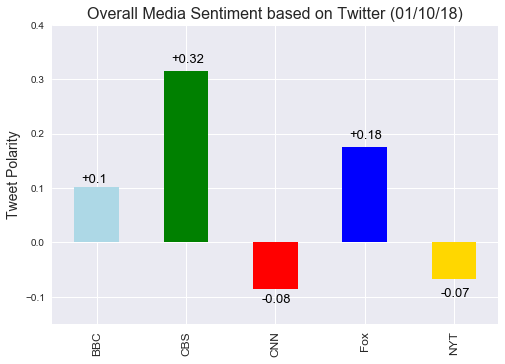

In [7]:
#Bar graph
plt.style.use("seaborn")
x_labels = ['BBC', 'CBS', 'CNN', 'Fox', 'NYT']
colors = ['lightblue', 'green', 'red', 'blue', 'gold']
x = np.arange(5)

averages_pd.plot(kind='bar',x='Media Source', y='Compound Mean', legend = False, color = colors)
plt.ylabel("Tweet Polarity", fontsize = 14)
plt.xlabel('')
plt.xticks(x, (x_labels), fontsize = 12)
plt.title('Overall Media Sentiment based on Twitter (01/10/18)', fontsize = 16)
plt.ylim(-0.15, 0.4)
for a,b in zip(x, averages_pd['Compound Mean']):
    b = round(b,2)
    if b < 0:
        plt.text(a-0.15, b-0.03, str(b), color='black',fontsize = 13)
    else:
        plt.text(a-0.17, b+0.01, '+' + str(b), color='black',fontsize = 13)
plt.show()
plt.savefig('twitter_overall_sentiment')